In [82]:
import pandas as pd
import numpy as np
#from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import matplotlib.pylab as plt
import numpy as np
#import graphviz
import itertools

%matplotlib inline


In [87]:
credit_df = pd.read_csv("german-credit-card.txt", delim_whitespace = True, header=None)

In [88]:
len(credit_df)

1000

In [89]:
credit_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [90]:
columns = ['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
           'saving_acc', 'present_emp_since', 'inst_rate', 'personal_status',
           'other_debtors', 'residing_since', 'property', 'age',
           'inst_plans', 'housing', 'num_credits',
           'job', 'dependents', 'telephone', 'foreign_worker', 'status']

In [91]:
credit_df.columns = columns

In [92]:
credit_df.columns

Index(['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
       'saving_acc', 'present_emp_since', 'inst_rate', 'personal_status',
       'other_debtors', 'residing_since', 'property', 'age', 'inst_plans',
       'housing', 'num_credits', 'job', 'dependents', 'telephone',
       'foreign_worker', 'status'],
      dtype='object')

In [93]:
#credit_df.target_names= ['Good', 'Bad']


In [94]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   amount             1000 non-null   int64 
 5   saving_acc         1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residing_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 non-null   object
 

In [95]:
credit_df.head()

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [96]:
X_features = list( credit_df.columns)
X_features.remove( 'status' )


In [97]:
credit_df_complete = pd.get_dummies( credit_df[X_features], drop_first = True )
#credit_df_complete = credit_df[X_features]

In [98]:
credit_df_complete.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,...,property_A124,inst_plans_A142,inst_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,6,1169,4,4,67,2,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,0,0,1,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,0,0,0,...,1,0,1,0,1,0,1,0,0,0


In [99]:
len( credit_df_complete.columns )

48

In [100]:
len(X_features)

20

In [101]:
#Change the reponse variable to 0 = No Default and 1 = Default
Y = credit_df.status - 1
X = credit_df_complete

In [102]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.1, random_state = 42 )
print(credit_df_complete.shape)

(1000, 48)


In [104]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test, y_test)))


acc for training data: 0.583
acc for test data: 0.610


#### ADD A FEW LINES CODE AS FOLLOWS TO IMPROVE THE MODEL, For example, you need to do data normalization, data standardization, and other data mining models.

In [105]:
#normalize data 

#df_norm = (credit_df_complete - credit_df_complete.min() / (credit_df_complete.max() - credit_df_complete.min()))

In [106]:
credit_df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   duration               1000 non-null   int64
 1   amount                 1000 non-null   int64
 2   inst_rate              1000 non-null   int64
 3   residing_since         1000 non-null   int64
 4   age                    1000 non-null   int64
 5   num_credits            1000 non-null   int64
 6   dependents             1000 non-null   int64
 7   checkin_acc_A12        1000 non-null   uint8
 8   checkin_acc_A13        1000 non-null   uint8
 9   checkin_acc_A14        1000 non-null   uint8
 10  credit_history_A31     1000 non-null   uint8
 11  credit_history_A32     1000 non-null   uint8
 12  credit_history_A33     1000 non-null   uint8
 13  credit_history_A34     1000 non-null   uint8
 14  purpose_A41            1000 non-null   uint8
 15  purpose_A410           1000 non-null   

In [107]:
#standardize data
#from sklearn.preprocessing import StandardScaler
#X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.25, random_state = 42 )

X_train=X[:980]
y_train=Y[:980]

X_test=X[980:]
y_test=Y[980:]

scaler = StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


# df_std = pd.DataFrame(scaler.transform(credit_df_complete), columns = credit_df_complete.columns)
# df_std

In [108]:
print(len(X_train),len(X_test))

980 20


In [109]:
#logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.score(X_train, y_train),clf.score(X_test, y_test))

0.7826530612244897 0.65


In [112]:
np.unique(y_test)

array([0, 1], dtype=int64)

In [113]:
#neural network
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test, y_test)))

acc for training data: 0.999
acc for test data: 0.750


C:\Users\auggie\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [114]:
#SVM
from sklearn.svm import SVC

svc = SVC(random_state=0).fit(X_train, y_train)
svc.score(X_test, y_test)
print(svc.score(X_train, y_train),svc.score(X_test, y_test))


0.889795918367347 0.7


In [115]:
#knn
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
print(classifier.score(X_train, y_train),classifier.score(X_test, y_test))


0.8193877551020409 0.55


In [116]:
#decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
#print scores on both train and test data
print(clf.score(X_train, y_train),clf.score(X_test, y_test))


1.0 0.7


In [117]:
#random forest tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train),clf.score(X_test, y_test))


1.0 0.8


If your predictions are correct (good or bad) for each example, that counts as 0. If your prediction for a good customer is "bad" add 1 to your total. If your prediction for a bad customer is "good", add 5 to your total. The lower the total the better your neural network. 

In [118]:
y_test.values

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

In [119]:
#new score
score=0
y_pred=mlp.predict(X_test) #prediction from clf model

for i in range(0,len(X_test)):
    if((y_test.values[i]==0) and (y_pred[i]==1)): #if some condition then add score value to score
        score+=1
    if((y_test.values[i]==1) and(y_pred[i]==0)):
        score+=5 #please check?    


In [120]:
score

13

# we need to plot some Confusion Matrix

In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [49]:
np.unique(y_train)

array([0, 1], dtype=int64)

In [50]:
len(X_test)

100

In [52]:
len(y_pred)

100

Confusion matrix, without normalization
[[63  8]
 [15 14]]
Normalized confusion matrix
[[0.89 0.11]
 [0.52 0.48]]


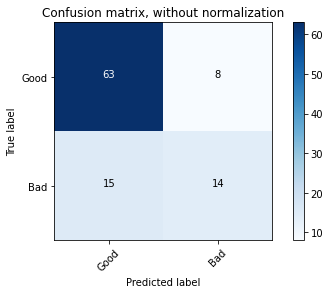

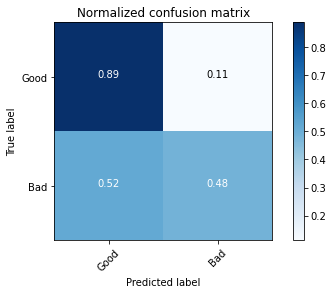

In [54]:
#Compute confusion matrix
from sklearn.metrics import confusion_matrix

class_names=credit_df.target_names
y_pred= mlp.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()